Análisis de Satisfacción usando R

In [49]:
#Librerías
#library(DBI)
library(RMySQL)
library(tidyverse)
library(ggplot2)
library(psych)


In [50]:
mysqlconnection = dbConnect(RMySQL::MySQL(),
                            dbname='sati',
                            host='localhost',
                            port=3306,
                            user='root',
                            password='DB123')
result = dbSendQuery(mysqlconnection, "SELECT sati,edad,proy,tiem,ause,sanc,jefe,sueld,rota FROM encuesta")
#listar coexiones dbListConnections( dbDriver( drv = "MySQL"))
#Cerrar coexiones

dat = fetch(result)
colnames(dat) <- c('sati','edad','proy','tiem','ause','sanc','jefe','suel','rota')
#lapply( dbListConnections( dbDriver( drv = "MySQL")), dbDisconnect)
#print(dbListConnections( dbDriver( drv = "MySQL")))

print(head(dat))
dim(dat)

  sati edad proy tiem ause sanc jefe suel rota
1   81   41    5    7    7    1    5 5000    5
2   89   43    6    8    1    2    5 4000    8
3   55   45    5    5    2    1    3 4000    6
4   21   NA    3    1   10    4    3 2500    4
5   NA   33   NA   NA    8    5   NA   NA   NA
6   21   24    1    3    1    3    1 1500    6


[1] 125   9

In [51]:
dat = dat[complete.cases(dat),]
rownames(dat) <- NULL 
print(head(dat))
dim(dat)

  sati edad proy tiem ause sanc jefe suel rota
1   81   41    5    7    7    1    5 5000    5
2   89   43    6    8    1    2    5 4000    8
3   55   45    5    5    2    1    3 4000    6
4   21   24    1    3    1    3    1 1500    6
5   71   35    7    5    4    5    4 4000    1
6   80   42    6    7    9    4    4 5000    8


[1] 100   9

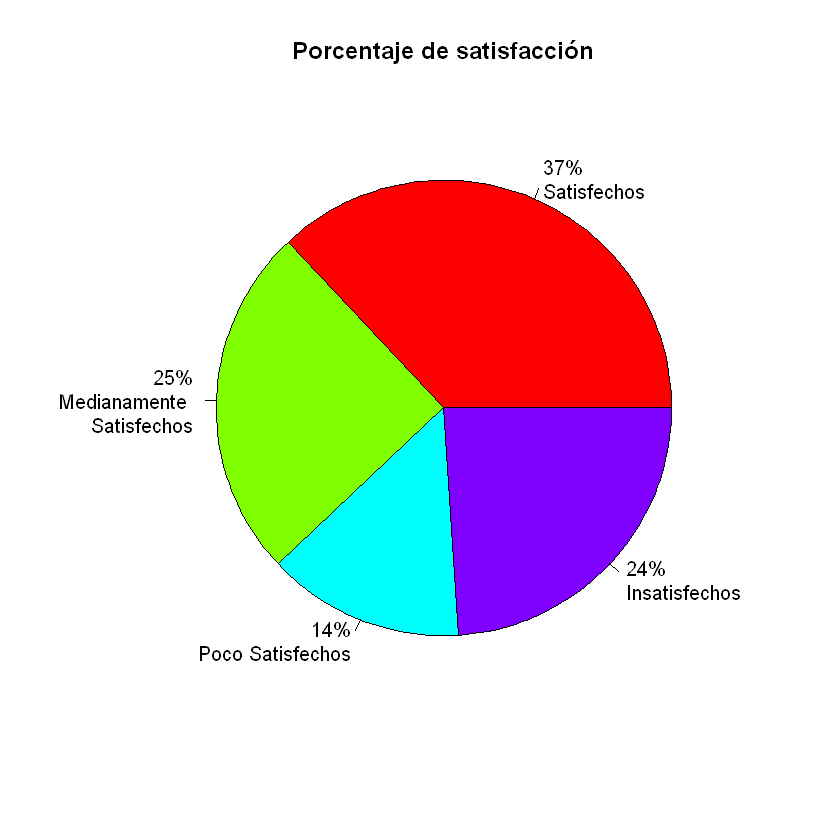

In [52]:
cir = dat$sati
ins = 0
poc = 0
med = 0
sat = 0
for (i in cir){
    if (i <= 40) {
        ins = ins +1
    } else if (i>40 && i<=70) {
        poc = poc +1
    } else if  (i>70 && i<= 80) {
        med = med +1
    } else {
        sat = sat +1
    }
}

eti = c('Satisfechos', 'Medianamente \nSatisfechos', 'Poco Satisfechos', 'Insatisfechos')
sizes = c(sat, med, poc, ins)
porcen <- round(100 * sizes / sum(sizes), 3)

pie(sizes,
    labels = paste(sizes,sep="","%\n",eti), 
    col = rainbow(4),main="Porcentaje de satisfacción")

,sati,edad,proy,tiem,ause,sanc,jefe,suel,rota
sati,1.000,0.219,0.804,0.795,0.205,0.178,-0.022,0.821,0.158
edad,0.219,1.000,0.204,0.299,0.055,-0.016,0.081,0.160,0.056
proy,0.804,0.204,1.000,0.616,0.199,0.229,-0.018,0.634,0.178
tiem,0.795,0.299,0.616,1.000,0.180,0.093,0.161,0.714,0.072
ause,0.205,0.055,0.199,0.180,1.000,0.045,-0.048,0.180,0.118
sanc,0.178,-0.016,0.229,0.093,0.045,1.000,-0.120,0.203,0.069
jefe,-0.022,0.081,-0.018,0.161,-0.048,-0.120,1.000,0.029,-0.041
suel,0.821,0.160,0.634,0.714,0.180,0.203,0.029,1.000,0.145
rota,0.158,0.056,0.178,0.072,0.118,0.069,-0.041,0.145,1.000


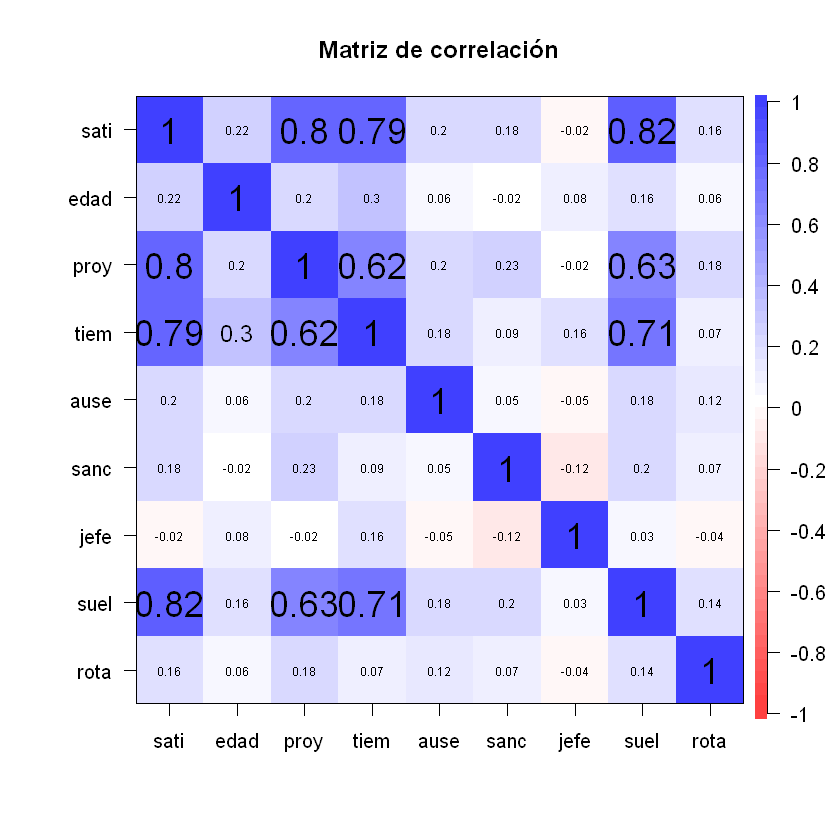

In [53]:
round(cor(dat),3)
corPlot(dat, cex = 1.2, main = "Matriz de correlación")

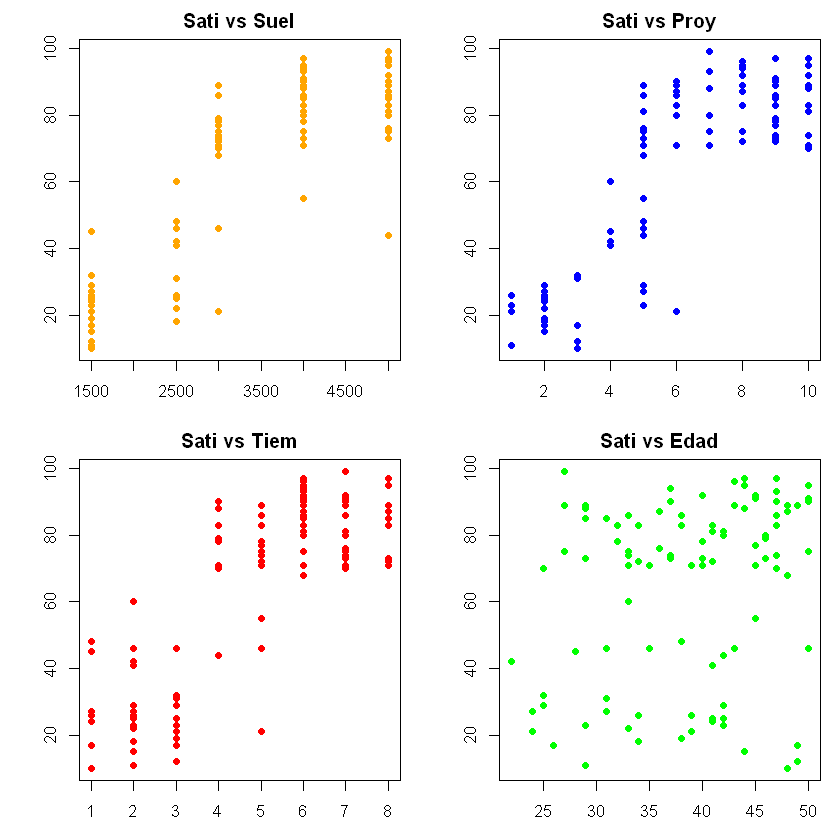

In [54]:
par(mfrow = c(2,2), mar = c(3, 4,2, 1))
plot(dat$suel, dat$sati,col = "orange", pch = 19, main="Sati vs Suel", xlab="", ylab="")
plot(dat$proy, dat$sati,col = "blue", pch = 19, main="Sati vs Proy", xlab="", ylab="")
plot(dat$tiem, dat$sati,col = "red", pch = 19, main="Sati vs Tiem", xlab="", ylab="")
plot(dat$edad, dat$sati,col = "green", pch = 19, main="Sati vs Edad", xlab="", ylab="")

In [55]:
fit <- lm(sati ~ proy + tiem + suel, data=dat)
summary(fit)


Call:
lm(formula = sati ~ proy + tiem + suel, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.851  -7.191   0.888   6.272  24.614 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.085842   3.270147  -1.555    0.123    
proy         3.872294   0.533484   7.258 1.02e-10 ***
tiem         3.703452   0.754923   4.906 3.80e-06 ***
suel         0.008062   0.001362   5.920 4.98e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.82 on 96 degrees of freedom
Multiple R-squared:  0.8465,	Adjusted R-squared:  0.8418 
F-statistic: 176.5 on 3 and 96 DF,  p-value: < 2.2e-16


In [56]:
predict(fit,dat)

1         2         3         4         5         6         7         8 
 80.50981  80.02355  65.04090  21.98981  72.78549  84.38210  80.50981  80.36123 
        9        10        11        12        13        14        15        16 
 30.22066  29.73440  84.23353  99.87128  29.73440  18.45520  64.38580  76.48894 
       17        18        19        20        21        22        23        24 
 72.63692  25.86211  33.77554  88.42324  25.86211  22.32750  60.68235 103.57473 
       25        26        27        28        29        30        31        32 
 68.74435  22.15865  80.69892  92.46437  76.82662  26.19979  83.57843  56.97890 
       33        34        35        36        37        38        39        40 
 84.88863  84.71978  99.70243  68.59578  81.01633  84.88863  18.28636  84.23353 
       41        42        43        44        45        46        47        48 
 69.39945  88.42324  33.77554  37.96525  60.85119  30.22066  72.46807  95.83014 
       49        50        51        52        53        54        55        56 
 33.92411  80.67865  25.86211  38.13409  80.67865  18.45520  72.46807  80.02355 
       57        58        59        60        61        62        63        64 
 76.32010  72.61665  41.83754  72.61665  22.15865  45.54099  26.34836  83.74727 
       65        66        67        68        69        70        71        72 
 37.96525  30.07208  87.93698  83.57843  72.63692  37.96525  87.93698  69.08204 
       73        74        75        76        77        78        79        80 
 99.70243  72.46807  84.40237  76.00268  95.51273  37.79640  68.08925  80.04382 
       81        82        83        84        85        86        87        88 
 72.61665  76.48894  88.42324  80.50981  22.15865  68.76462  88.25439  83.89584 
       89        90        91        92        93        94        95        96 
 72.46807  83.74727  21.98981  72.44780  88.59208  84.23353  72.46807  72.13039 
       97        98        99       100 
 72.44780  88.10582  45.54099  22.32750

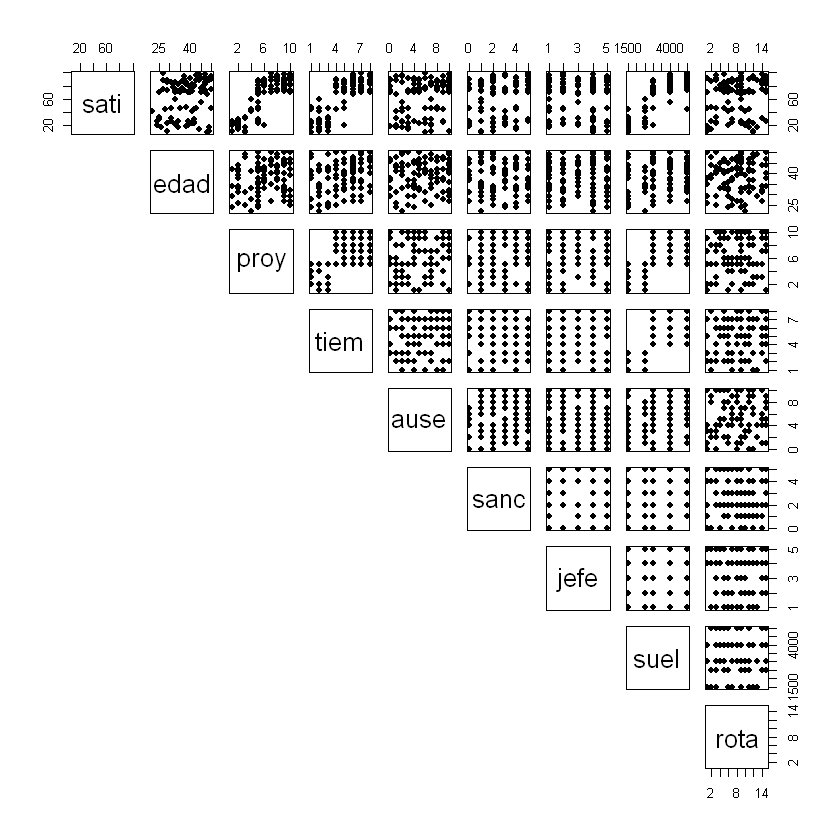

In [57]:
pairs(dat[,1:9], pch = 19, lower.panel = NULL)

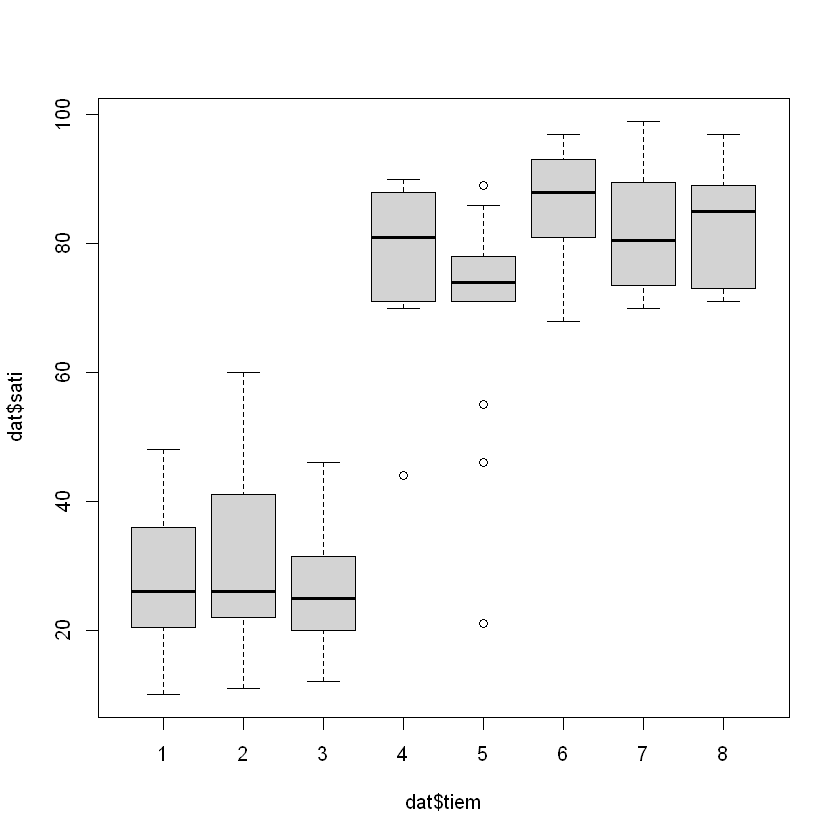

In [58]:
boxplot(dat$sati~dat$tiem)

In [62]:
result = dbSendQuery(mysqlconnection, "SELECT nombre, sati, correo, numero 
                                        FROM encuesta 
                                        INNER JOIN trabajadores ON TRABAJADORES_ID = trabajadores.ID 
                                        WHERE sati <= 40")
#listar coexiones dbListConnections( dbDriver( drv = "MySQL"))
#Cerrar coexiones

insat = fetch(result)
colnames(insat) <- c('Nombre','Satisfacción','Email','Celular')
#lapply( dbListConnections( dbDriver( drv = "MySQL")), dbDisconnect)
#print(dbListConnections( dbDriver( drv = "MySQL")))

head(insat,5)
dim(insat)

,Nombre,Satisfacción,Email,Celular
,<chr>,<int>,<chr>,<int>
1,Alden Weaver,21,aldenweaver1551@entelgy.com,907515947
2,Hollee Combs,21,holleecombs478@entelgy.com,977232865
3,Xavier Stein,22,xavierstein@entelgy.com,995240878
4,Odessa Mathis,12,odessamathis4088@entelgy.com,945330377
5,Jasmine Brown,32,jasminebrown3893@entelgy.com,993767387


[1] 30  4

In [63]:
lapply( dbListConnections( dbDriver( drv = "MySQL")), dbDisconnect)

Warning message:
"Closing open result sets"
Warning message:
"Closing open result sets"


[[1]]
[1] TRUE

[[2]]
[1] TRUE